In [3]:
!pip install opendatasets


In [4]:
import opendatasets as od

data = od.download("https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2")




Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedmudassiralam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2


100%|██████████| 744M/744M [00:04<00:00, 189MB/s]

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [7]:
!ls /content/dataset
!ls /content/dataset/garbage-dataset



garbage-dataset
battery     cardboard  glass  paper    shoes
biological  clothes    metal  plastic  trash


In [8]:
train_path = '/content/dataset/garbage-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='validation'
)

Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(train_gen.num_classes, activation='softmax')  # matches your dataset’s 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 473s 952ms/step - accuracy: 0.4033 - loss: 1.8565 - val_accuracy: 0.5731 - val_loss: 1.2893
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 453s 914ms/step - accuracy: 0.6156 - loss: 1.1424 - val_accuracy: 0.6328 - val_loss: 1.1218
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 455s 918ms/step - accuracy: 0.7063 - loss: 0.8699 - val_accuracy: 0.6635 - val_loss: 1.0711
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 446s 902ms/step - accuracy: 0.8052 - loss: 0.5827 - val_accuracy: 0.6885 - val_loss: 1.0253
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 442s 893ms/step - accuracy: 0.8554 - loss: 0.4195 - val_accuracy: 0.6974 - val_loss: 1.0541
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 503s 896ms/step - accuracy: 0.9004 - loss: 0.2925 - val_accuracy: 0.7030 - val_loss: 1.1678
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 444s 897ms/step - accuracy: 0.9263 - loss: 0.2234 - val_accuracy: 0.7035 - val_loss: 1.2484
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 442s 893ms/step - accuracy: 0.9415 -

In [11]:
model.save('waste_classifier_model.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


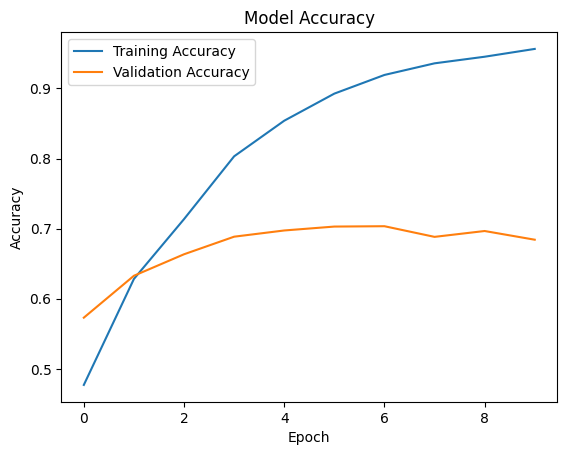

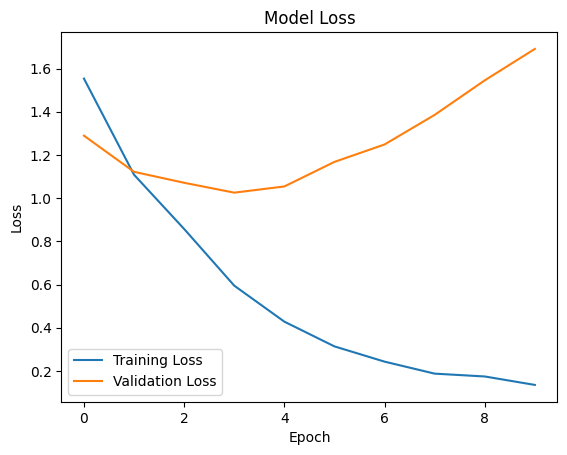

In [12]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


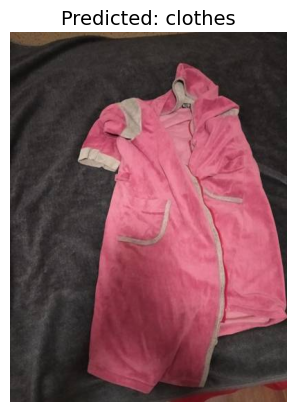

✅ Predicted class: clothes
Image array shape: (1, 128, 128, 3)


In [18]:


import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Pick any one image from your dataset folder to test
img_path = '/content/dataset/garbage-dataset/clothes/clothes_1.jpg'   # you can change this file name

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(prediction)]

# Show the image and result
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f'Predicted: {predicted_class}', fontsize=14)
plt.show()

print("✅ Predicted class:", predicted_class)
print("Image array shape:", img_array.shape)

In [19]:
from google.colab import files
files.download('waste_classifier_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Recreate the same model structure
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')  # 10 classes in your dataset
])

# Compile it again
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Recreate the same model structure, using Input layer explicitly
model = Sequential([
    Input(shape=(128, 128, 3)), # Explicitly define the input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')  # 10 classes in your dataset
])

# Compile it again
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)